In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np
import graphics as g
import interpolate as interp

def imshow(img):
    # https://gist.github.com/ctmakro/3ae3cd9538390b706820cd01dac6861f
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

print("import success")

import success


### Linear

```python
def linear(p0, p1, u):
    return (1 - u) * p0 + u * p1
```

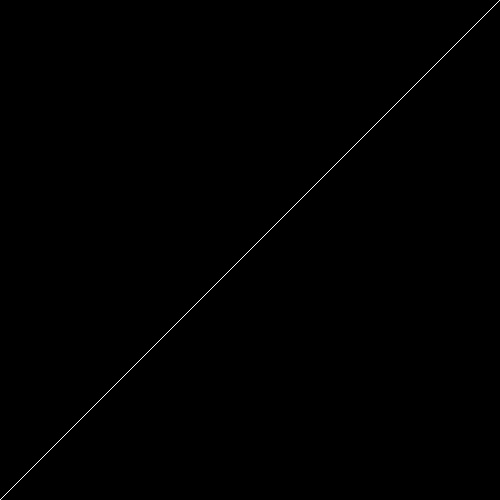

In [4]:
control_points = np.array([
    [0, 0],
    [499, 499]
], dtype=int)

curve = interp.bezier_curve(control_points, 5)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

### Quadatric

```python
def quadratic(p0, p1, p2, u):
    p0_u = linear(p0, p1, u)
    p1_u = linear(p1, p2, u)

    return linear(p0_u, p1_u, u)
```

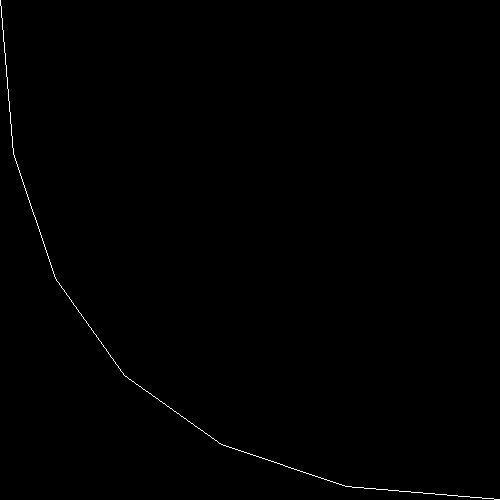

In [5]:
control_points = np.array([
    [0, 499],
    [0, 0],
    [499, 0]
], dtype=int)

curve = interp.bezier_curve(control_points, 7)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

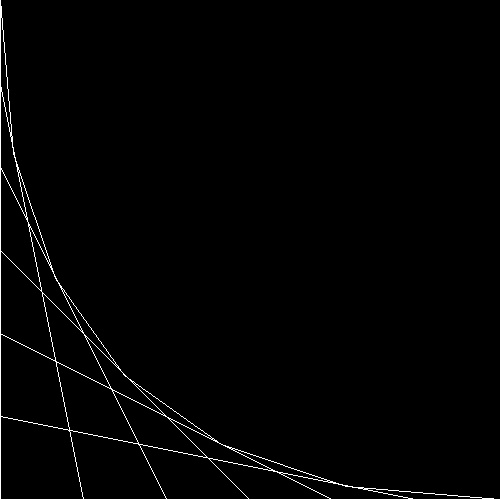

In [6]:
for i, u in enumerate(np.linspace(0, 1, 7)):
    p0 = interp.linear(*control_points[0:2], u)
    p1 = interp.linear(*control_points[1:3], u)
    g.draw_line(screen, p0.astype(int), p1.astype(int))

imshow(screen)

### Cubic

```python
def cubic(p0, p1, p2, p3, u):
    p0_u = quadratic(p0, p1, p2, u)
    p1_u = quadratic(p1, p2, p3, u)

    return linear(p0_u, p1_u, u)
```

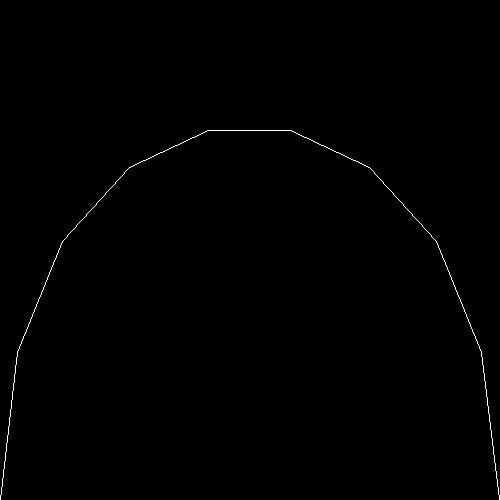

In [7]:
control_points = np.array([
    [0, 0],
    [0, 499],
    [499, 499],
    [499, 0]
], dtype=float)

curve = interp.bezier_curve(control_points, 10)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

### De Castlejau's recursive algorithm

```python
def _de_casteljaus(points, u):
    if len(points) == 1:
        return points[0]
    else:
        p0 = de_castlejau(points[0:-1], u)
        p1 = de_castlejau(points[1:], u)

        return linear(p0, p1, u)
```

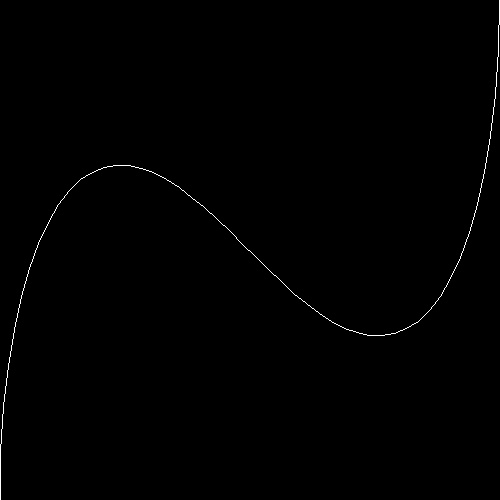

In [8]:
control_points = np.array([
    [0, 0],
    [0, 499],
    [249, 499],
    [249, 0],
    [499, 0],
    [499, 499]
], dtype=float)

curve = interp.bezier_curve(control_points, 50)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

### Cubic Bernstein Polynomials

# TODO: derive these somehow
Cubic interpolation can be simplified to

$$

(1 - u)^3 P_0 +  
3u(1 - u)^2 P_1 + 
3u^2(1 - u) P_2 + 
u^3 P_3

$$

The control point "weights" are in the form of third degree Bernstein polynomials.
These components can be further simplified and extracted into matrix form.

$$

\begin{bmatrix}

1 & u & u^2 & u^3

\end{bmatrix}

\begin{bmatrix}

 1 &  0 &  0 & 0 \\
-3 &  3 &  0 & 0 \\
 3 & -6 &  3 & 0 \\
-1 &  3 & -3 & 1

\end{bmatrix}

\begin{bmatrix}

P_0 \\
P_1 \\
P_2 \\
P_3

\end{bmatrix}

$$



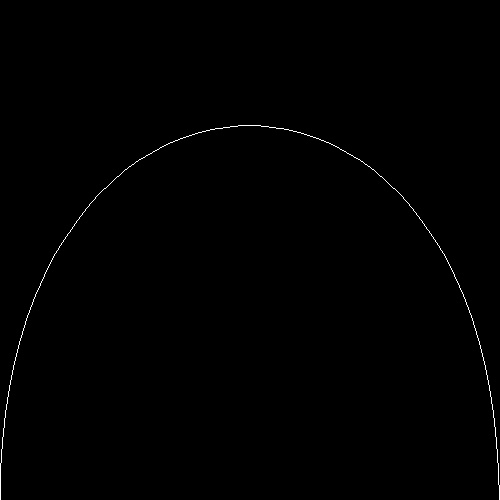

In [9]:
control_points = np.array([
    [0, 0],
    [0, 499],
    [499, 499],
    [499, 0]
], dtype=float)

curve = interp.cubic_bezier(control_points, 50)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)